In [1]:
import os
os.getcwd()

'/Users/sisovina/github/mtcnn-pytorch/notebooks'

In [2]:
os.chdir('..')
os.getcwd()

'/Users/sisovina/github/mtcnn-pytorch'

In [4]:
from mtcnn.detector import detect_faces

In [9]:
from PIL import Image
from glob import glob
validation_images = glob('/Users/sisovina/Downloads/style_transfer_2023_images/validation_data/*')
len(validation_images)

25

In [17]:
import numpy as np
import cv2
from PIL import Image, ImageOps
import os

def resize(image, max_dim=768):
    w, h = image.size
    if w > h:
        if w > max_dim:
            h *= max_dim / w
            w = max_dim
    else:
        if h > max_dim:
            w *= max_dim / h
            h = max_dim
    image = image.resize((int(w), int(h)))
    return image

def show_detected_faces(filename, threshold=0.98):
    image = Image.open(filename).convert('RGB')
    image = resize(image)
    image = ImageOps.exif_transpose(image)
    # image = np.array(image)
    boxes = detect_faces(image)[0]
    image = Image.open(filename).convert('RGB')
    image = resize(image)
    image = ImageOps.exif_transpose(image)
    rgb_img = np.array(resize(image))
    for b in boxes:
        if b[4] < threshold:
            continue
        b = [int(round(value)) for value in b]
        cv2.rectangle(rgb_img, (b[0], b[1]), (b[2], b[3]), (0,255,0), 2)

    return Image.fromarray(rgb_img)

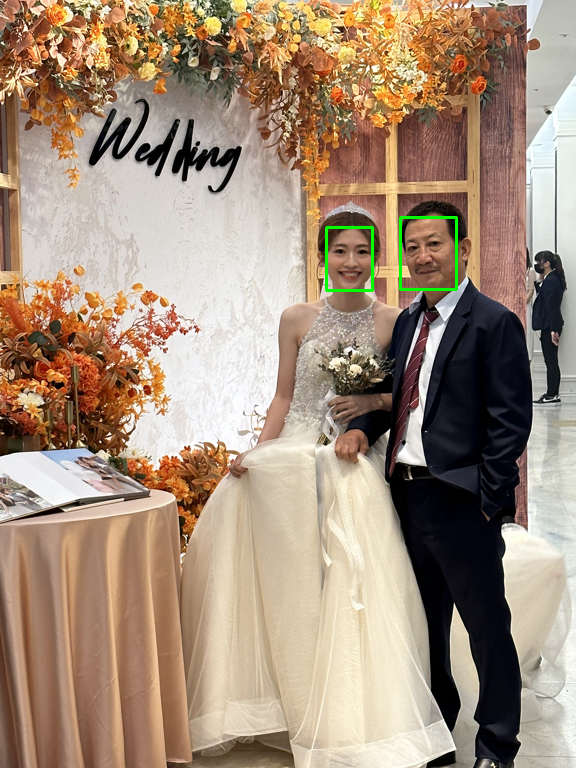

In [42]:
show_detected_faces(validation_images[24])